In [58]:
import pandas as pd
import numpy as py
import string
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words


In [2]:
file=pd.read_csv('Dice_US_jobs_utf81.csv',error_bad_lines=False)
print(file.columns)

b'Skipping line 1564: expected 12 fields, saw 35\nSkipping line 1914: expected 12 fields, saw 13\nSkipping line 4055: expected 12 fields, saw 38\nSkipping line 8715: expected 12 fields, saw 17\nSkipping line 10089: expected 12 fields, saw 18\nSkipping line 10683: expected 12 fields, saw 15\nSkipping line 13947: expected 12 fields, saw 13\nSkipping line 13982: expected 12 fields, saw 13\nSkipping line 15642: expected 12 fields, saw 13\nSkipping line 17411: expected 12 fields, saw 13\nSkipping line 17542: expected 12 fields, saw 23\nSkipping line 18214: expected 12 fields, saw 13\nSkipping line 18225: expected 12 fields, saw 13\nSkipping line 18374: expected 12 fields, saw 40\n'


Index(['country_code', 'date_added', 'job_board', 'job_description',
       'job_title', 'job_type', 'location', 'organization', 'page_url',
       'phone_number', 'salary', 'sector'],
      dtype='object')


In [16]:
type(string.punctuation)
temp='Microsoft Dynamics AX, Project Manager'
temp=temp.translate(str.maketrans('', '', string.punctuation))
temp.split()

['Microsoft', 'Dynamics', 'AX', 'Project', 'Manager']

In [20]:
word_freq={}
for job in file['job_title']:
    try:
        job=job.translate(str.maketrans('', '', string.punctuation))
        words=job.split()
        for word in words:
            if word in word_freq:
                word_freq[word]=word_freq[word]+1
            else:
                word_freq[word]=1
    except:
        pass


In [52]:
most_freq=sorted(word_freq.items(),key=lambda x: x[1],reverse=True)[0:40]
most_freq=dict(most_freq)
print(dict(most_freq))

{'Network': 676, 'Senior': 2485, 'Support': 655, 'Developer': 4834, 'Java': 959, 'Sr': 1176, 'SAP': 359, 'Software': 1907, 'Technical': 513, 'Engineer': 5295, 'and': 329, 'Technician': 379, 'End': 337, 'Business': 818, 'Administrator': 760, 'QA': 344, 'IT': 541, 'C': 343, 'Security': 623, 'Manager': 1528, 'Full': 339, 'Analyst': 1970, 'in': 320, 'Systems': 966, 'Data': 819, 'Specialist': 447, 'Front': 339, 'Net': 298, 'DevOps': 293, 'Project': 900, 'Web': 541, 'NET': 478, 'Oracle': 307, 'Consultant': 577, 'Lead': 887, 'with': 487, 'Application': 442, 'Stack': 294, 'Development': 278, 'Architect': 938}


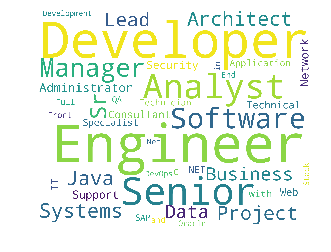

In [54]:
wc = WordCloud(background_color='white',
               width=4000,
               height=3200,
               ).generate_from_frequencies(most_freq)
wc.to_file('jobcloud.png') #保存图片
plt.imshow(wc)  #用plt显示图片
plt.axis('off') #不显示坐标轴
plt.show() #显示图片


In [61]:
requirement_freq={}
for job in file['job_description']:
    try:
        job=job.lower()
        job=job.translate(str.maketrans('', '', string.punctuation))
        words=job.split()
        for word in words:
            if word in requirement_freq:
                requirement_freq[word]=requirement_freq[word]+1
            else:
                requirement_freq[word]=1
    except:
        pass

In [62]:
re_freq_no_stopwords={}
for temp_req in requirement_freq:
    if temp_req not in stop_words:
        re_freq_no_stopwords[temp_req]=requirement_freq[temp_req]


most_freq_req=sorted(re_freq_no_stopwords.items(),key=lambda x: x[1],reverse=True)[0:40]
most_freq_req=dict(most_freq_req)
print(dict(most_freq_req))
print(len(requirement_freq))

{'apply': 22101, 'years': 26635, 'support': 19432, 'work': 51838, 'will': 46545, 'knowledge': 19585, 'development': 31626, 'receiving': 12734, 'system': 13052, 'technical': 20167, 'requirements': 14120, 'project': 19616, 'position': 23588, 'employment': 15919, 'security': 13312, 'services': 15123, 'systems': 20493, 'protected': 14784, 'management': 23618, 'opportunity': 13609, 'forward': 13434, 'including': 13628, 'please': 15538, 'must': 15492, 'team': 24483, 'eligibility': 12957, 'software': 24778, 'inc': 14618, 'business': 28673, 'required': 29963, 'new': 13562, 'solutions': 14804, 'click': 12934, 'technology': 13898, 'design': 22367, 'ability': 13355, 'skills': 22050, 'experience': 73942, 'working': 14883, 'data': 25887}
212732


In [59]:
# stop_words = get_stop_words('en')
stop_words = get_stop_words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't